# <center> Причины убытков приложения Procrastinate Pro+

Проект представляет собой выявление причин убытков рекламной кампании развлекательного приложения Procrastinate Pro+. В рамках анализа убытков изучаем данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года.

Анализ будет включать в себя слудющие этапы:
- Загрузка и подготовка данных к анализу;
- Добавление функций для расчёта и анализа LTV, ROI, удержания и конверсии;
- Исследовательский анализ данных;
- Анализ маркетинга;
- Оценка окупаемости рекламы;
- Формирование общих выводов и рекоменаций.

### Загрузка данных и подготовка их к анализу

На первом этапе загрузим данные о визитах, заказах и рекламных расходах и присвоим им переменные. Также проведем предобработку данных - поиск пропусков и дубликатов, соответствие формата перменных.


In [1]:
#подключаем библиотеки, необходимые для работы
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt


In [2]:
#получаем таблицы с данными
visits, orders, costs  = (pd.read_csv('/datasets/visits_info_short.csv'),
                          pd.read_csv('/datasets/orders_info_short.csv'),
                          pd.read_csv('/datasets/costs_info_short.csv'))
display(visits.head(5), orders.head(5), costs.head(5)) #воводим первые 5 строк датафреймов для ознакомления

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [46]:
#приводим название столбцов к единому стилю согласно "змеиному регистру"
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]
costs.columns = costs.columns.str.lower()


In [4]:
#получаем информацию о таблицах
print('Информация о таблице с визитами', visits.info())
print()
print('Информация о таблице с заказами', orders.info())
print()
print('Информация о таблице с ценами', costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
Информация о таблице с визитами None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
Информация о таблице с заказами None

<class 'pandas.core.frame.DataFrame'>
RangeI

Исходя из информации, полученно по таблицам, видим, что колонки, сожержащие информацию о дате и времени, представлены в формате object. Приведем данные колонки к необходимому формату.

In [5]:
#приводим столбцы с датами в нужный формат 
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date  


In [6]:
#считаем количество пропусков в таблицах
print('Количество пропусков в таблице visits:\n', visits.isnull().sum())
print()
print('Количество пропусков в таблице orders:\n', orders.isnull().sum())
print()
print('Количество пропусков в таблице costs:\n', costs.isnull().sum())

Количество пропусков в таблице visits:
 user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

Количество пропусков в таблице orders:
 user_id     0
event_dt    0
revenue     0
dtype: int64

Количество пропусков в таблице costs:
 dt         0
channel    0
costs      0
dtype: int64


Проверим таблицы на наличие явных и неявных дубликатов.

In [7]:
#считаем количество дубликатов в таблицах
print('Количество дубликатов в таблице visits:', visits.duplicated().sum())
print('Количество дубликатов в таблице orders:', orders.duplicated().sum())
print('Количество дубликатов в таблице costs:', costs.duplicated().sum())

Количество дубликатов в таблице visits: 0
Количество дубликатов в таблице orders: 0
Количество дубликатов в таблице costs: 0


In [8]:
#проверим на наличие неявных дубликатов колонки, где можно ошибиться в написании названий
print('Список стран:', visits['region'].unique())
print('Cписок устройств пользователей:', visits['device'].unique())
print('Названия рекламных каналов:', visits['channel'].unique())

Список стран: ['United States' 'UK' 'France' 'Germany']
Cписок устройств пользователей: ['iPhone' 'Mac' 'Android' 'PC']
Названия рекламных каналов: ['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']


Таким образом, на первом этапе проведена подготовка данных к последющему анализу: подключены библиотеки, необходиме для работы, обозначены и выгружены таблицы, исправлен формат временных данных, а также проведена проверка на наличие пропусков и дубликатов в таблицах. Данные полные, отсутствуют дубликаты, что позволяет сразу перейти к следюущему этапу анализа. 

### Добавление функций для расчёта и анализа LTV, ROI, удержания и конверсии.

На данной этапе будут заданы основные функции для проведения исследования.
Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функция для создания пользовательских профилей get_profiles ()

In [9]:
def get_profiles(visits, orders, ad_costs):
    #находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    #находим дату первого посещения и первый день месяца, в котором произошло посещение
   
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    #добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    #считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    #объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    #делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    #добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    #стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


#### Функция для подсчёта Retention Rate get_retention()

In [10]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    #добавляем столбец 'payer' в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    #исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    #собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    #функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        return result

    #получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    #получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    #возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time


#### Функция для подсчёта конверсии get_conversion()

In [11]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    #исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    #определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .first()
        .reset_index()
    )

    #добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    #рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    #группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = ['cohort'] + dimensions

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        return result

    #получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    #для таблицы динамики конверсии убираем 'cohort' из dimensions если был добавлен
    dimensions = [dim for dim in dimensions if dim != 'cohort']

    #получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    #возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time


#### Функция для подсчёта LTV get_ltv()

In [12]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    #исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    #добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    
    #рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    #группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = ['cohort'] + dimensions

    #функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        #строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        
        #вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        
        #собираем датафрейм с данными пользователей и значениями CAC,
        cac = (
            df.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        #считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)
        roi['cohort_size'] = cohort_sizes['cohort_size']
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        return result, roi

    #получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    #для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions.remove('cohort')

    #получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  
        result_grouped, 
        result_in_time,  
        roi_grouped, 
        roi_in_time,  
    )


#### Функция для сглаживания фрейма  filter_data()

In [13]:
def filter_data(df, window):
    #для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Функция для визуализации удержания plot_retention ()

In [14]:
def plot_retention(retention, retention_history, horizon, window=7):

    #задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    #исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    #в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    #если в индексах таблицы удержания только payer,добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    #в таблице графиков — два столбца и две строки, четыре ячейки
    #в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    #во второй ячейке строим кривые удержания неплатящих
    #вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    #в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    #получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    #фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    #в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    #фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### Функция для визуализации конверсии plot_conversion()

In [15]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    #задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    #исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    #в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    #первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    #второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        #столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Функция для визуализации LTV и ROI plot_ltv_roi()

In [16]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    #задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    #из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    #в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    #стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    #из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    #в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    #первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    #второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    #столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    #третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    #столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    #четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    #пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    #столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

На втором этапе выполнения поставленной задачи были заданы функции для расчета метрик, а также ддя их визуализации. Используются функции для следующих метрик: создание профилей пользователей, подсчёт Retention Rate, конверсии и LTV. Функции для построения графиков будут использоваться для визуализации LTV и ROI, постоения графиков конверсии и RR. 

### Исследовательский анализ данных
Исследовательский анализ данных будет включать в себя следующие этапы;
- составление профилей пользователей. Определение минимальной и максимальной даты привлечения пользователей.
- определение, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построение таблицы, отражающей количество пользователей и долю платящих из каждой страны.
- выявление, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построение таблицы, отражающей количество пользователей и долю платящих для каждого устройства.
- изучение рекламных источников привлечения и определение каналов, из которых пришло больше всего платящих пользователей. Построение таблицы, отражающей количество пользователей и долю платящих для каждого канала привлечения.



In [17]:
#получаем портрет пользователей и определяем минимульную и максимальную дату привлечения
profiles = get_profiles(visits, orders, costs)
acquisition_max = profiles['dt'].max()
acquisition_min = profiles['dt'].min()
display(profiles.head(5))
print('Максимальная дата привлечения:', acquisition_max,  '\nМинимальная дата привлечения:', acquisition_min)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Максимальная дата привлечения: 2019-10-27 
Минимальная дата привлечения: 2019-05-01


Для построения портрета пользователей использовалась ранее заданная функция get_profiles(). На выходе имеем таблицу, отражающую основную информацию о пользователеях: user_id, время начала сессии, канал привлечения, утройство входа, региона, стоимость привлечения пользователя, а также столбец "payer", где True означает платящего пользователя, а False неплатящего. 
Рассматриваемый период привлечения в данном исследовании: 2019-05-01 - 2019-10-27 .

Далее, рассмотрим долю платящих пользователей по нескольким критериям: регион, устройство и канал привлечения.

In [18]:
#создаем сводную таблицу для payer по регионам
region_profiles = profiles.pivot_table(
    index='region',             
    columns='payer',            
    values='user_id',           
    aggfunc='count'          
)

#добавляем столбец с долей платящих пользователей
region_profiles['payer_share'] = (
    region_profiles[True] / (region_profiles[True] + region_profiles[False])
)

#выводим рузультат для проверки
display(region_profiles.sort_values(by='payer_share'))


payer,False,True,payer_share
region,,,
France,16787,663,0.037994
UK,16875,700,0.039829
Germany,14365,616,0.041119
United States,93100,6902,0.069019


Как видим, не так уж и много пользователей являются платящими - максимально их число приходится на США, там доля платящих пользователей составляет 6.9%, в то время как в остальных регионах не наберется и 5% платящих пользователей.

In [19]:
#создаем сводную таблицу для payer по используемым устройствам
device_profiles = profiles.pivot_table(
    index='device',             
    columns='payer',            
    values='user_id',           
    aggfunc='count'          
)

#добавляем столбца с долей платящих пользователей
device_profiles['payer_share'] = (
    device_profiles[True] / (device_profiles[True] + device_profiles[False])
)

#выводим рузультат для проверки
display(device_profiles.sort_values(by='payer_share'))


payer,False,True,payer_share
device,,,
PC,28918,1537,0.050468
Android,32982,2050,0.058518
iPhone,51097,3382,0.062079
Mac,28130,1912,0.063644


Рассмотрим долю платящих пользователей по девайсам - 6.37% процентов платящих пользователей совершают покупку с помощью МАС, 6.21% совершают покупки через iPhone, 5.85% с помощью телефона на базе Android, а минимальная доля среди вышеперечисленных критериев приходится на РС - там доля платящих пользователей составляет всего 5%. 

In [20]:
#создаем сводную таблицу для payer по каналу привлечения
channel_profiles = profiles.pivot_table(
    index='channel',             
    columns='payer',            
    values='user_id',           
    aggfunc='count'          
)

#добавляем столбца с долей платящих пользователей
channel_profiles['payer_share'] = (
    channel_profiles[True] / (channel_profiles[True] + channel_profiles[False])
)

#выводим рузультат для проверки
display(channel_profiles.sort_values(by='payer_share'))

payer,False,True,payer_share
channel,,,
organic,55279,1160,0.020553
OppleCreativeMedia,8372,233,0.027077
LeapBob,8291,262,0.030633
MediaTornado,4208,156,0.035747
YRabbit,4147,165,0.038265
WahooNetBanner,8100,453,0.052964
RocketSuperAds,4096,352,0.079137
TipTop,17683,1878,0.096007
lambdaMediaAds,1924,225,0.104700


Максимальную доля платящих пользователей имеют каналы FaceBoom (12.20%), AdNonSense (11.34%) и lambdaMediaAds(10.47%). Минимальная доля - менее 4% платящих пользователей привлекли каналы YRabbit, MediaTornado, LeapBob, OppleCreativeMedia. Как мы видим, канал привлечения влияет на долю платящих пользователей больше, чем девайсы или регион проживания пользователей. 

Посмотрим, на какие регионы работают данные каналы привлечения.

In [21]:
channel_region = profiles.pivot_table(
    index='channel',             
    columns='region',            
    values='user_id',           
    aggfunc='count'
).fillna(0)
channel_region

region,France,Germany,UK,United States
channel,,,,
AdNonSense,1366.0,1219.0,1295.0,0.0
FaceBoom,0.0,0.0,0.0,29144.0
LeapBob,2988.0,2519.0,3046.0,0.0
MediaTornado,0.0,0.0,0.0,4364.0
OppleCreativeMedia,2991.0,2562.0,3052.0,0.0
RocketSuperAds,0.0,0.0,0.0,4448.0
TipTop,0.0,0.0,0.0,19561.0
WahooNetBanner,2971.0,2579.0,3003.0,0.0
YRabbit,0.0,0.0,0.0,4312.0


Лидер по доле платящих пользователей FaceBoom работает на привлечение американской аудитории, AdNonSense и lambdaMediaAds - на привлечение Европейской. 

### Маркетинг
Изучение маркетинга продукта будет включать слудющие этапы:
- рассчет общей суммы расходов на маркетинг.
- выяснение, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- построение графика с визуализацией динамики изменения расходов во времени по неделям по каждому источнику, а также по месяцам.
- рассчет, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 



In [22]:
#рассчитаем общую сумму затрат на маркетинг с округлением до двух знаков после запятой
total_costs = costs['costs'].sum().round(2)
print('Общая сумма расходов на маркетинг составляет:', total_costs, 'YE.')

Общая сумма расходов на маркетинг составляет: 105497.3 YE.


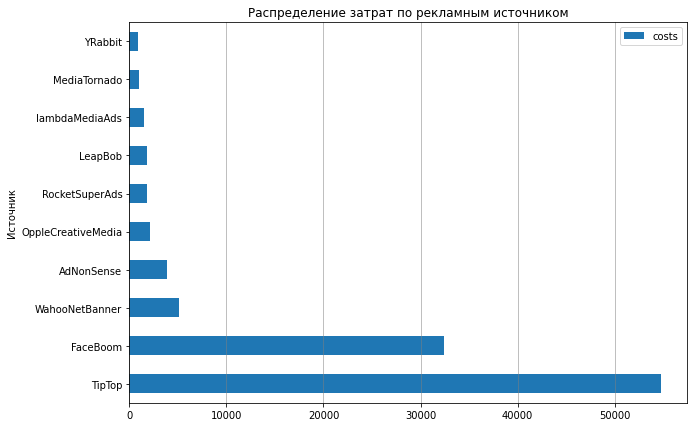

In [23]:
#создадим таблицу с распределением трат по рекламным источникам
channel_costs = (
    costs
    .groupby(by='channel')
    .agg({'costs': 'sum'})
    .sort_values(by='costs', ascending=False)
)


#визуализируем полученную информацию
channel_costs.plot(
    y='costs', 
    kind='barh',  
    figsize=(10, 7),
    title='Распределение затрат по рекламным источником',
    xlabel='Источник',
    ylabel='Cумма затрат' 
)
plt.grid(True, linestyle='-', linewidth=0.5, color='gray', axis='x')
plt.show()


Найдена одна из возможных причин финансовых потерь - на канал TipTop тратится свыше 50000 на маркетинг, однако, доля платящих пользователей, приходящих из этого источника на 3% меньше, чем у FaceBoom. Также, FaceBoom привлек почти на 10000 больше пользователей, которым, потенциально, можно продать услугу. 

Посмотрим динамику трат по неделям и месяцам. 

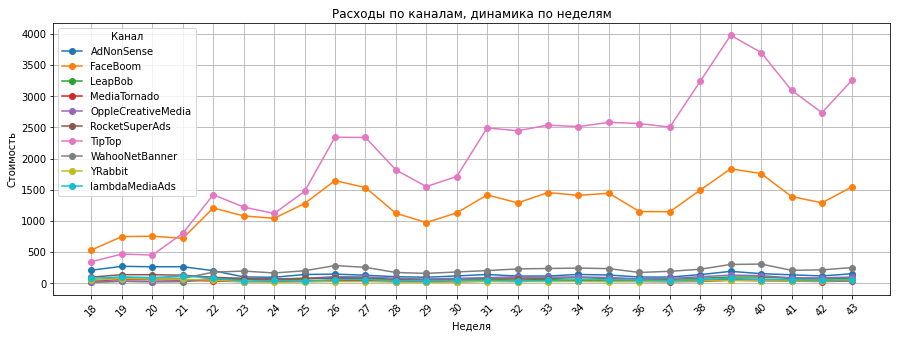

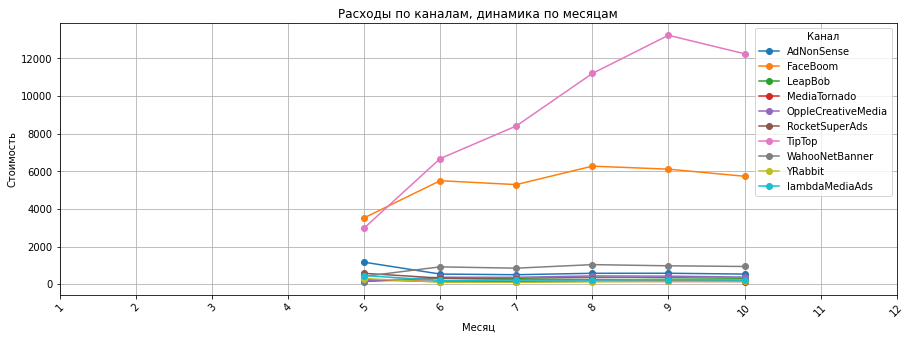

In [24]:
#преобразовываем dt обратно в datetime для выгрузки недели и месяца
costs['dt'] = pd.to_datetime(costs['dt'])

#добавляем столбец со значением недели
costs['week'] = costs['dt'].dt.isocalendar().week

#добавляем столбец со значением месяца
costs['month'] = costs['dt'].dt.month

#возвращаем dt обратно в date для последующей корректной работы
costs['dt'] = costs['dt'].dt.date

#группируем данные по неделям и каналам
weekly_costs = costs.groupby(['channel', 'week']).agg({'costs': 'sum'}).reset_index()

#и по месяцам и каналам
monthly_costs = costs.groupby(['channel', 'month']).agg({'costs': 'sum'}).reset_index()

#задаем графики
fig, ax = plt.subplots(figsize=(15, 5))
for channel in weekly_costs['channel'].unique():
    channel_data = weekly_costs[weekly_costs['channel'] == channel]
    ax.plot(channel_data['week'], channel_data['costs'], marker='o', label=channel)
    
ax.set_title('Расходы по каналам, динамика по неделям')
ax.set_xlabel('Неделя')
ax.set_ylabel('Стоимость')
ax.legend(title='Канал')
plt.xticks(weekly_costs['week'].unique(), rotation=45)
plt.grid(True)
plt.show()


fig, ax = plt.subplots(figsize=(15, 5))
for channel in monthly_costs['channel'].unique():
    channel_data = monthly_costs[monthly_costs['channel'] == channel]
    ax.plot(channel_data['month'], channel_data['costs'], marker='o', label=channel)
    
ax.set_title('Расходы по каналам, динамика по месяцам')
ax.set_xlabel('Месяц')
ax.set_ylabel('Стоимость')
ax.legend(title='Канал')
plt.xticks(range(1, 13), rotation=45)
plt.grid(True)
plt.show()


Все каналы, за исключением TipTop и FaceBoom, имеют стабильную динанику трат как по неделям, так и по месяцам. TipTop резко возрастает с 37 недели, возможно, это связано с какими-либо колебаниями в стоимости самого канала, оибо какие-то сезонные факторы, посокольку, с 9 месяца траты начали уменьшаться. 

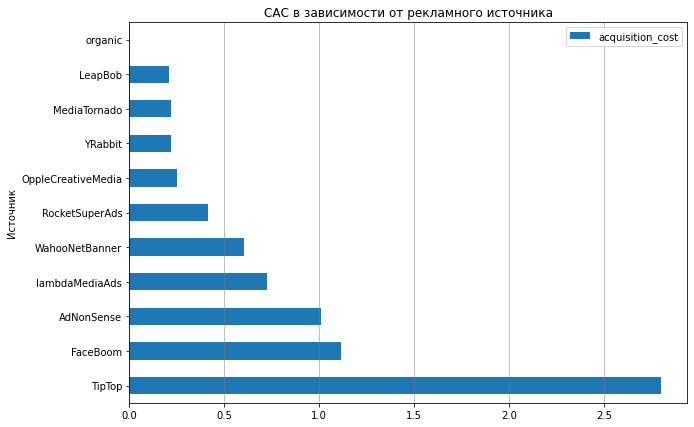

In [25]:
cac_channel = (
    profiles
    .groupby(by='channel')
    .agg({'acquisition_cost': 'mean'})
    .sort_values(by='acquisition_cost', ascending=False)
)


cac_channel.plot(
    y='acquisition_cost', 
    kind='barh',  
    figsize=(10, 7),
    title='CАС в зависимости от рекламного источника',
    xlabel='Источник',
    ylabel='САС' 
)
plt.grid(True, linestyle='-', linewidth=0.5, color='gray', axis='x')
plt.show()

На графике выше видно, что стоимости привлечания одного клиента по каналу TipTop почти в 2.5 раза выше, чем по каналам, которые имеют большую долю платящих пользователей (FaceBoom, AdNonSense и lambdaMediaAds). Возможно, отделу маркетинга стоит пересмотреть тактику рекламной кампании и сократить траты на привлечение клиентов через канал TipTop, а сосредоточиться на других, в которых соотношение САС и количество пользователей намного привлекательней, нежели у канала TipTop.

Таким образом, на данном этапе выявлены каналы с наибольшей суммой затрат на маркетинг - FaceBoom и TipTop. Это два канала-"гиганта", на которые приходится около 80% рекламного бюджета. Далее, проведем исследование окупаемости инвестиций на маркетинг, чтобы определиться, необходимо ли вкладываться в привлечение пользователей через эти каналы.

### Оценка окупаемость рекламы

- Проанализируем окупаемость рекламы с помощью графиков LTV и ROI. Дополнительно взглянем на изменения в динамике LTV, CAC и ROI, чтобы выявить тренды и паттерны.
- Рассмотрим конверсию пользователей и отслеживание её изменений со временем. Аналогично поступим с удержанием — построим и проанализируем соответствующие графики.
- Изучим окупаемость рекламы, разделяя данные по типам устройств, используемых пользователями. Построим и проанализируем графики LTV и ROI по каждому типу устройства, включая динамику этих метрик.
- Посмотрим на окупаемость рекламы в разрезе различных стран. Для этого построим графики LTV и ROI, а также изучим, как LTV, CAC и ROI менялись со временем для каждой страны.
- Погрузимся в окупаемость рекламных каналов. Построим графики LTV и ROI для каждого канала, чтобы понять, какие из них работают на нас лучше всего и как со временем изменяется их эффективность.
- также, ответим на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?


In [26]:
#задаем момент и горизонт анализа
observation_date = datetime(2019, 11, 1).date()  
horizon_days = 14  

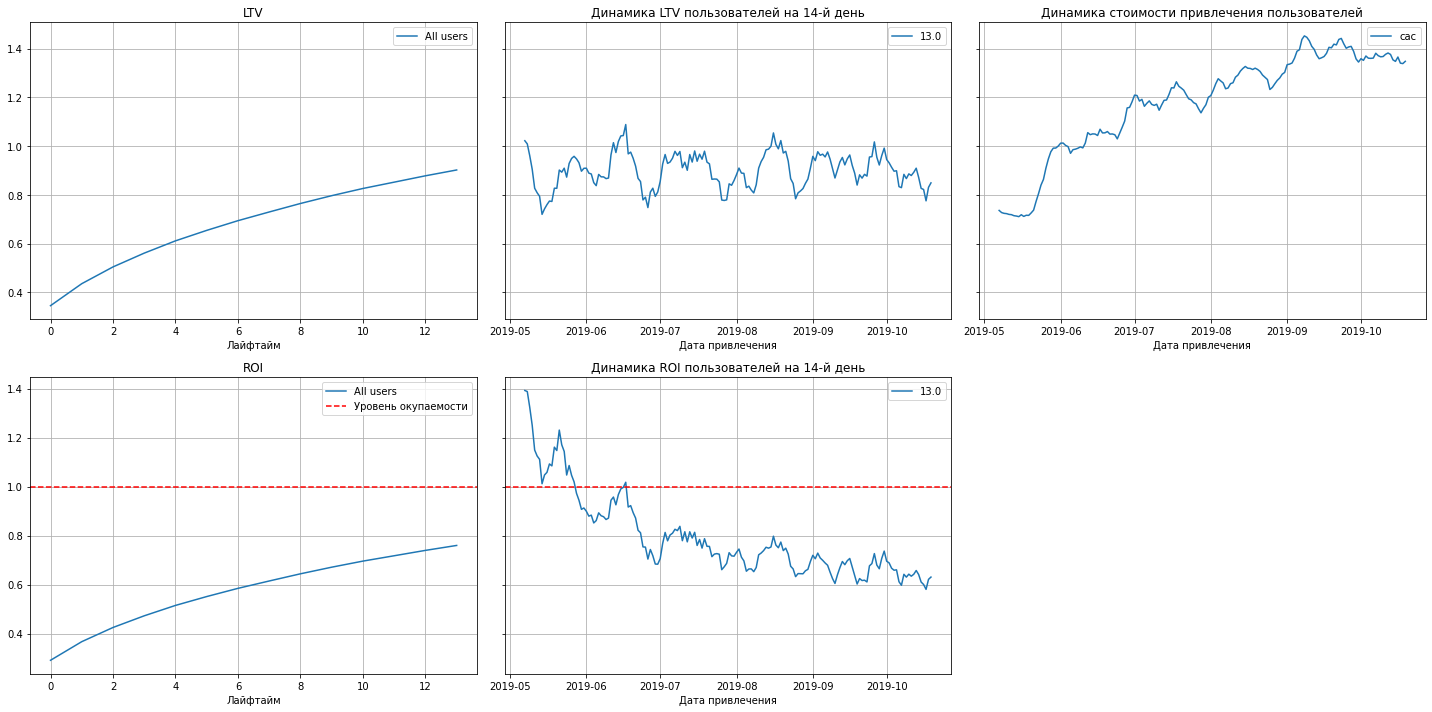

In [27]:
#считаем LTV и ROI с исключением органических пользователей
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days
)

#строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Рассмотрим полученные графики окупаемости рекламы. На первом графики видим нормальную тенденцую увеличения LTV относительно лайфтайма - ведь, чем больше пользователь "живет", тем больше средств с него можно заполучить. На графике, отражающем динамику LTV видны колебания, однако, явная тенденция к уменьшению или увеличению LTV отсутствует. Касательно САС, можем наблюдать рост с некоторыми колебаниями. Вполне ожидаемо, поскольку ранее мы также обнаружили увеличение затрат на маркетинг по некоторым каналам, что напрямую может влиять на САС при отсутствии увеличения притока пользователей. 

Перейдем к оценке графиков, отражающих ROI. Как и LTV, ROI увеличивается с увеличением лайфтайма, однако, окупаемость рекламы даже не доходит до 80%, а график динамики явно указывает на необходимость пересмотра маркетинговой стратегии, ведь, с увеличением затрат на привлечение пользователей мы видим явную отрицательную динамику окупаемости инвестиций. 

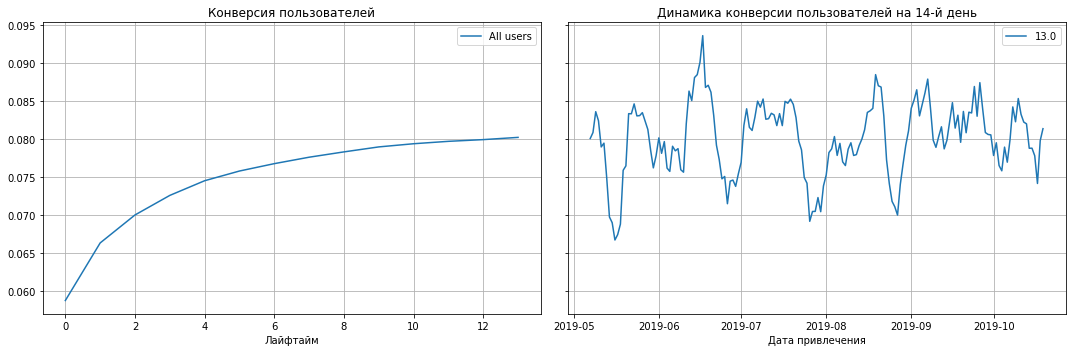

In [28]:
#рассчитываем конверсию пользователей
conversion_raw, conversion_grouped, conversion_history  = get_conversion(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 


Пользователи конвертируются хорошо.

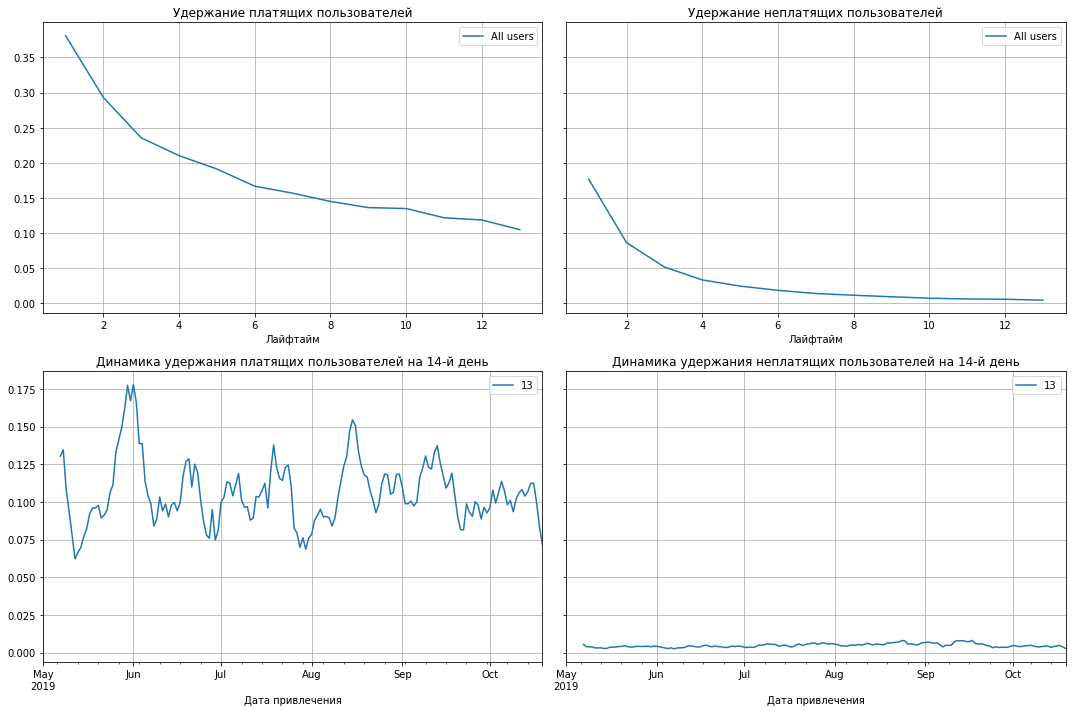

In [29]:
#рассчтываем удержание пользователей
retention_raw, retention_grouped, retention_history = get_retention(profiles.query('channel != "organic"'), visits, observation_date, horizon_days
)
plot_retention(retention_grouped, retention_history, horizon_days) 

На графиках удержания как платящих, так и неплатящих пользователей мы видим постепенной уменьшение вовлечения пользователей с увеличением лайфтайма, для многих бизнес-моделей характерно такое состояние, поскольку с увеличением лайфтайма юзеры могут чаще уходить. 

В динамике удержания платящих пользователей на 14-й день мы видим большие колебания, которые могут быть связаны со многими факторами: изменение маркетинговой кампании, ухудщение/улучшение качества обслуживания, некоторые внещние причины. Как правило, платящие пользователи более остро реагируют на изменение как продукта, так и окружающей среды, ведь мало кто хочет платить за услуги, которые не актуальны или не соответствуют ожидания по качеству. 

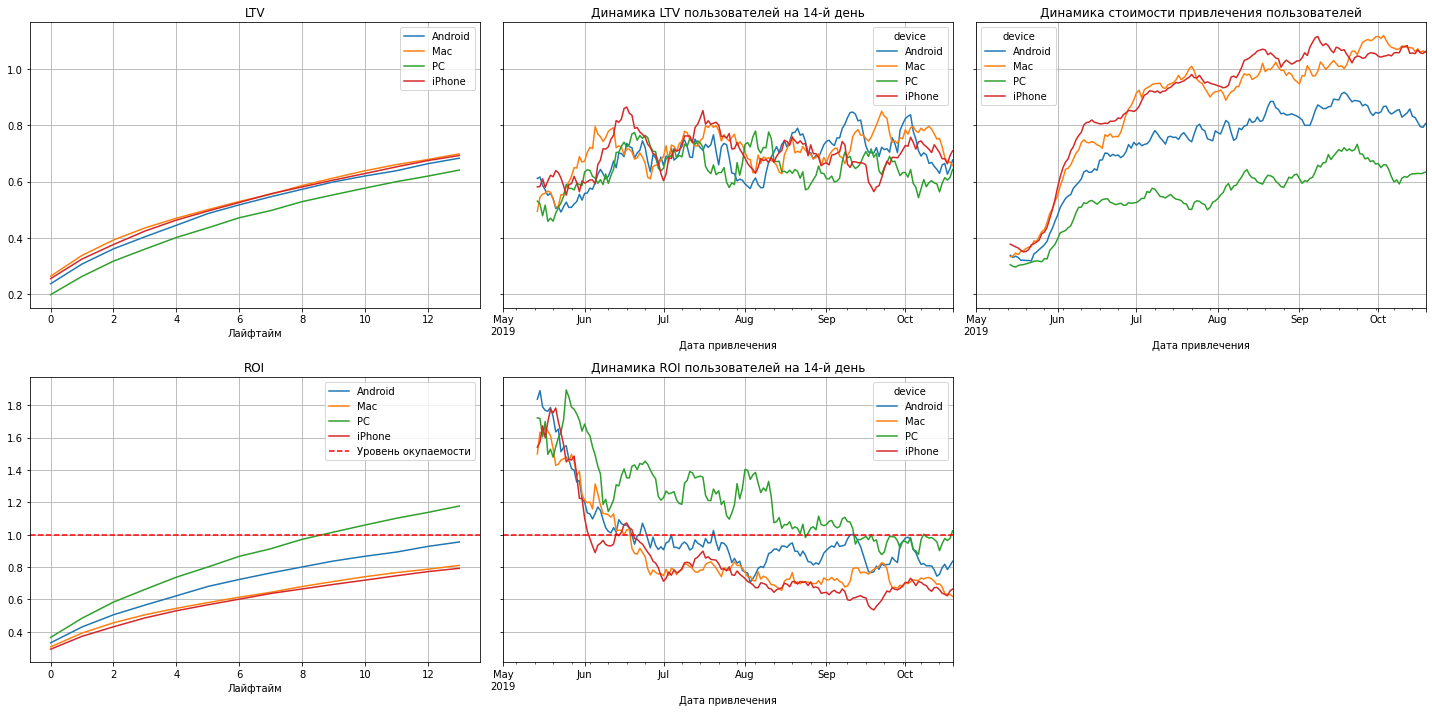

In [30]:
#смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

На графике, отражающем LTV пользователей с разбивкой по устройствам видим, все устройства демонстрируют рост LTV со временем. Однако, LTV пользователей iPhone и Mac чуть выше, чем у пользователей PC и Android, что косвенно может говорить о большей платежеспособности. Динамика LTV на 14-й день колеблется по всем устройствам без выхода в какую-либо стабильную динамику. 
CAC для пользователей iPhone и Mac в начале периода был выше, чем САС пользователей Android и PC. 

А вот окупаемость инвестиций лучше всего у пользователей PC - после 9 дня лайфтама вышло за 100%, также, к 100% близится окупаемость пользователей Android. Результаты вполне ожидаемы, поскольку стоимость привлечения этой категории пользователей значительно ниже, нежели владельцев "яблочных" устройств. 

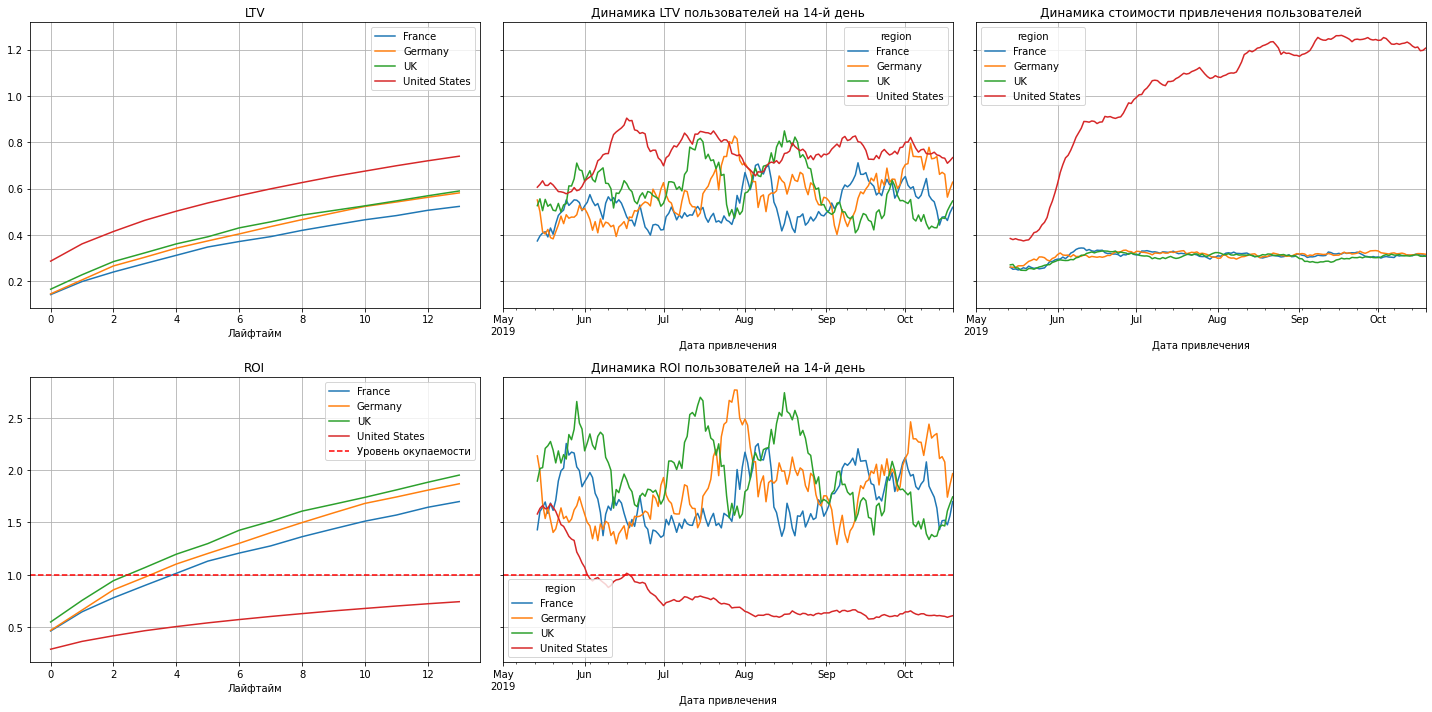

In [31]:
#смотрим окупаемость с разбивкой по регионам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Итак, проанализировав LTV, ROI и САС клиентов с разбивкой по странам, видим, что максимальное LTV с увеличением лайфтайма показывают пользователи из Америки, однако, у этих же пользователей САС в несколько раз превышает затраты на привлечения пользователей из Европейского контингента. В то же время, Американцы единственные имеют отрицатлеьную окепаемость, в то время как ROI Англичан "отбивается" практически в 2 раза в условиях двухнедельного лайфтайма. 
Можно сказать, что пользователи из Европы имеют стабильный САС, постепенное увеличение LTV, а также высокий показатель ROI, что может делать этих пользователей привлекательнее для продукта.
 

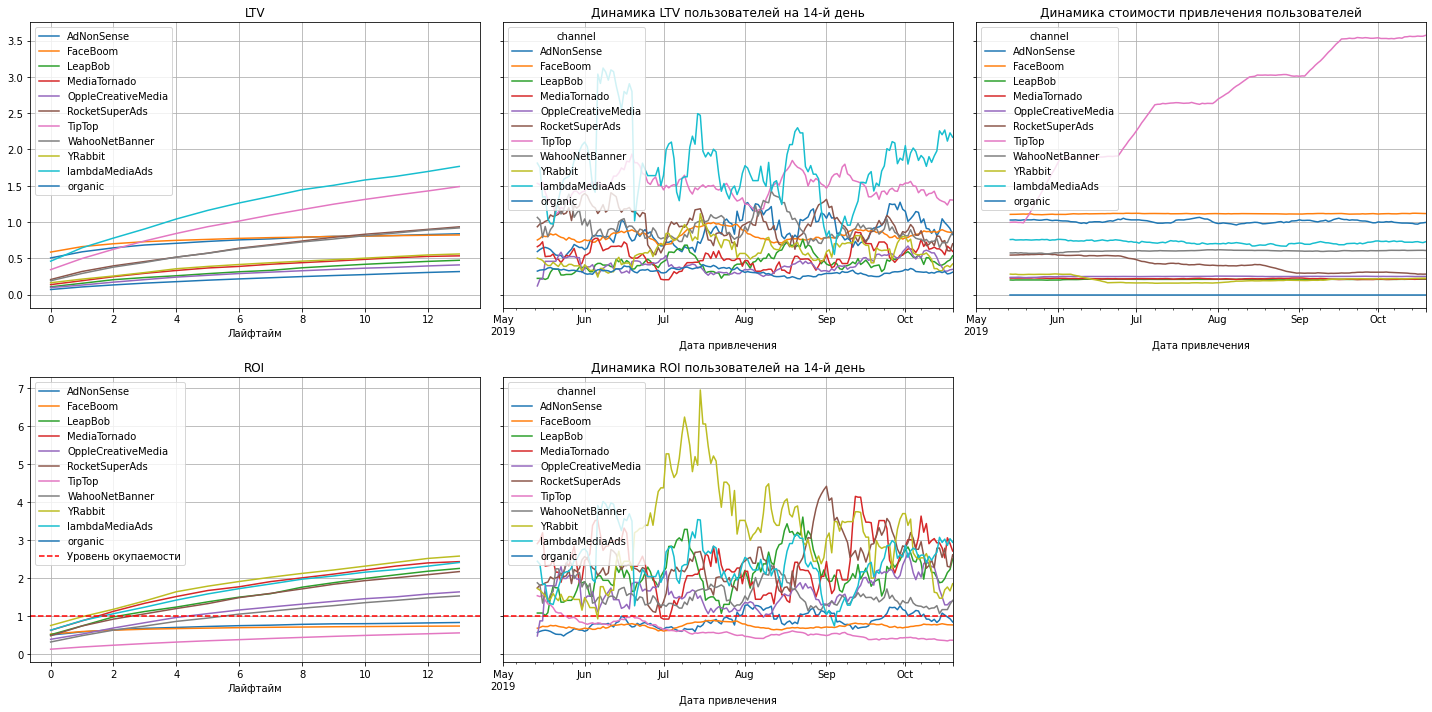

In [32]:
# смотрим окупаемость с разбивкой по рекламным каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Полученные графики слабо читаемы, особенно в ситуациях с динамикой. Поскольку, не все каналы привлечения имеют высокую долю платящих пользователей, рассмотрим отдельно каналы, где доля платящих пользователей составляет выше 5% - WahooNetBanner, RocketSuperAds, TipTop, lambdaMediaAds, AdNonSense, FaceBoom.
Однако, на полученном графике ROI сразу можно отметить неокупаемые каналы - TipTop, FaceBoom и AdNonSense.

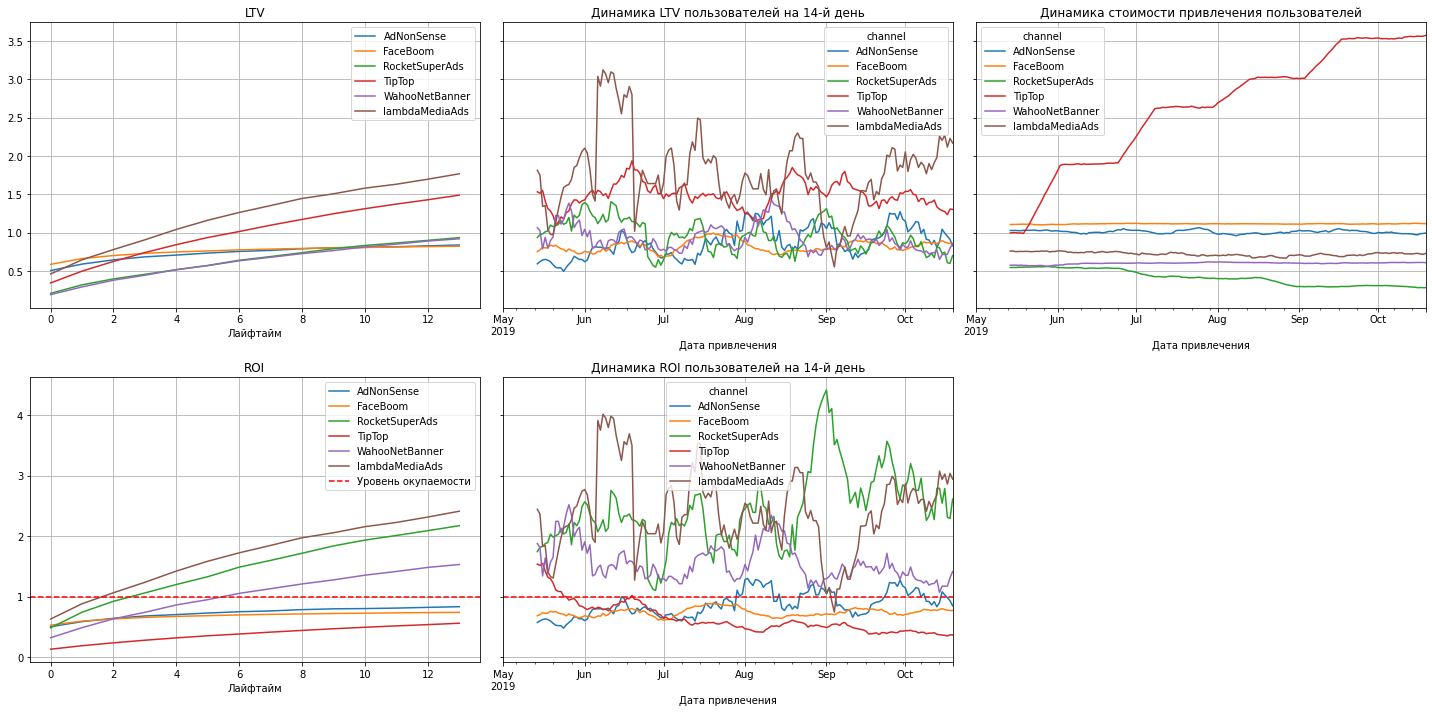

In [33]:
#создадим отдельный список каналов, где доля платящих пользователей выше 5%
interested_channels = ['WahooNetBanner', 'RocketSuperAds', 'TipTop', 'lambdaMediaAds', 'AdNonSense', 'FaceBoom']

#отфильтруем profiles только с интересующими каналами
filtered_profiles = profiles[profiles['channel'].isin(interested_channels)]

#вызываем функцию с отфильтрованным profiles
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    filtered_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)


LTV растёт со временем для всех каналов, но у lambdaMediaAds и TipTop несколько выше, чем у других каналов. Потенциально, это выражает долгосрочную ценность клиентов, однако в ситуации с ROI TipTop не выходит на окупаемость, в то время как lambdaMediaAds показывает увеличение ROI более чем в 2 раза при достаточно невысокой и стабильной стоимости привлечения одного клиента. Не окупаются также каналы AdNonSense и FaceBoom.
Стоит обратить внимание на RocketSuperAds - его окупаемость также составляет свыше 200%, в то время как его САС единственным показывает отрицательную динамику. 

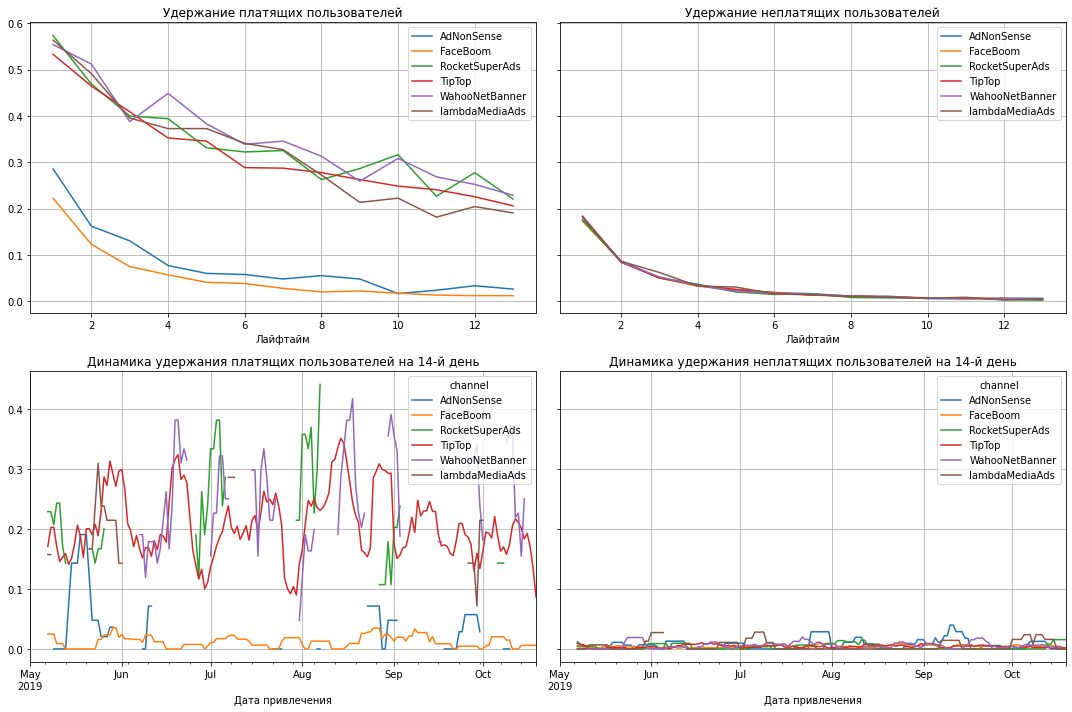

In [34]:
#дополнительно рассмотрим удержание пользователей по отфильтрованным каналам
dimension = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    filtered_profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
plot_retention(retention_grouped, retention_history, horizon_days) 

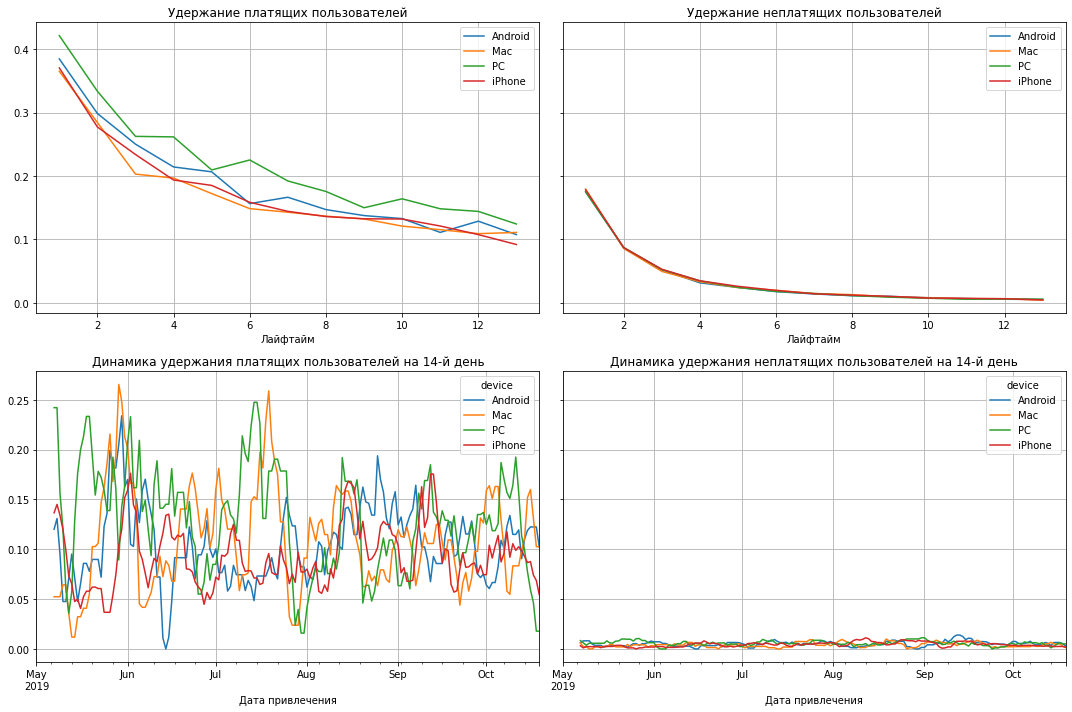

In [43]:
#рассчтываем удержание пользователей по устройствам
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic"'), visits, observation_date, horizon_days, dimensions = dimensions
)
plot_retention(retention_grouped, retention_history, horizon_days) 

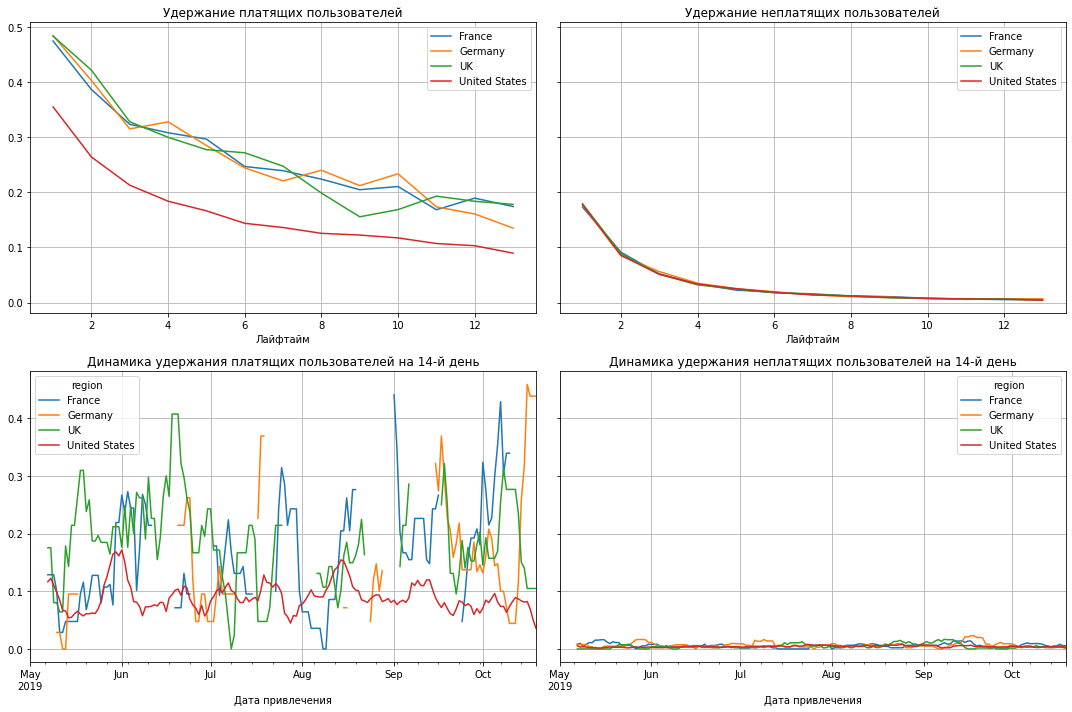

In [44]:
#рассчтываем удержание пользователей по устройствам
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic"'), visits, observation_date, horizon_days, dimensions = dimensions
)
plot_retention(retention_grouped, retention_history, horizon_days) 

AdNonSense и FaceBoom имеют самое худшее удержание пользователей - к концу лайфтайма удержание платящих пользователей практически равно 0. Остальные каналы, хоть также и имеют отрицательную динамику, но пользователи все же остаются. Удержание платящих пользователей в разрезе по странам показывает стабильное снижение у пользователей из Амеркии и чуть большее удержание, но с большими колебаниями у Европейских пользователей. Удержание пользователей в зависимости от устройст показало стабильное снижение у Mac IPhone и снижение с колебаниями у пользователей Android и PC.


Таким образом, проведенная оценка окупаемости рекламы выявило абсолютно неприбыльные источники - TipTop, FaceBoom и AdNonSense. Обнаружено также низкое удержание пользователей по каналам TipTop и AdNonSense. Регионально лучшее LTV и худшее ROI имеют пользователи из Америки. Это прямое свидетельство неэффективности рекламной кампании в данном регионе. Касательно Америки, лучше сконцентрироваться на канале привлечения RocketSuperAds, как каналу, имеющему хорошую окупаемость инвестиций. На Европейском рынке все каналы окупаются, что свидетельствует об эффективности вовлечения в продукт Европейской аудитории.

### Общие выводы
Окупаемость рекламы не достигает порога, что говорит о неэффективности текущей маркетинговой стратегии. Особенно это касается каналов с высокими инвестициями, но низким удержанием и ROI, таких как TipTop, FaceBoom и AdNonSense. Сразу же стоит отказаться от канала TipTop, поскольку денежные затраты на него превышают суммарные затраты на другие каналы. Освободившиеся денежные средства можно перенаправить на потенциально прибыльные каналы, такие как lambdaMediaAds, RocketSuperAds, WahooNetBanner.
Пользователи устройств Apple имеют более высокий LTV и CAC, что может указывать на высокую платёжеспособность, но требует более внимательного управления стоимостью привлечения для поддержания положительного ROI. Касательно анализа регионов, то пользователи из Америки показывают высокий LTV, но затраты на их привлечение и низкий ROI требуют пересмотра стратегий в этом регионе. В то же время, пользователи из Европы представляются более привлекательными благодаря стабильному САС и высокому ROI.


Основные рекомендации маркетинговому отделу:
- обдумать стратегии, направленные на увеличение удержания и повторных покупок, особенно для платящих пользователей;
- разработка стратегий удержания пользователей iPhone и Mac;
- проанализировать доступные рекламыне источники для Американского рынка с невысокой стоимость привлечения клиента;
- сделать упор на развитие рекламы в Евррпейском регионе, как на наиболее окупаемом и стабильном рынке;
- регулярно контролировать изменения в LTV, CAC и ROI, оптимизировать рекламный бюджет и адаптировать стратегии с целью недопущения повышения затрат на неокупаемую рекламу. 